# Machine Learning with Large Datasets
- dataset source: [Million Song Data](http://millionsongdataset.com/) (~300GB)


### 0. Start a Spark Session and Install Libraries

In [1]:
from pyspark.sql import *

sc = spark.sparkContext
print(f'num executors: {sc.getConf().get("spark.executor.instances")}')

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1710894526251_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

num executors: 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'\nNote : If you are having issues with your plots not showing, try running `%matplot plt` in a new code box after you have run the rest of the plotting code.\n'

### 1. Data Loading and Preparation

Earlier, we have extracted relevant features from and converted format of the full raw Million Song Dataset. We now want to load our converted dataset from the S3 Storage.

Note that although you can load all chunks of the dataset using `*`, we recommend you only load in a subset while developing so that processing takes shorter time when you are just verifying your ideas. Be sure to add your own S3 bucket name to cmd 8.

In [3]:
from pyspark.sql.types import DoubleType, StringType, StructField, StructType

schema = StructType([StructField('song_hotttnesss', DoubleType(), True),
                       StructField('artist_familiarity', DoubleType(), True),
                       StructField('artist_hotttnesss', DoubleType(), True),
                       StructField('artist_id', StringType(), True),
                       StructField('artist_latitude', DoubleType(), True),
                       StructField('artist_location', StringType(), True),
                       StructField('artist_longitude', DoubleType(), True),
                       StructField('artist_name', StringType(), True),
                       StructField('title', StringType(), True),
                       StructField('danceability', DoubleType(), True),
                       StructField('duration', DoubleType(), True),
                       StructField('end_of_fade_in', DoubleType(), True),
                       StructField('energy', DoubleType(), True),
                       StructField('key', DoubleType(), True),
                       StructField('key_confidence', DoubleType(), True),
                       StructField('loudness', DoubleType(), True),
                       StructField('mode', DoubleType(), True),
                       StructField('mode_confidence', DoubleType(), True),
                       StructField('start_of_fade_out', DoubleType(), True),
                       StructField('tempo', DoubleType(), True),
                       StructField('time_signature', DoubleType(), True),
                       StructField('time_signature_confidence', DoubleType(), True),
                       StructField('artist_terms', StringType(), True),
                       StructField('artist_terms_freq', StringType(), True),
                       StructField('artist_terms_weight', StringType(), True),
                       StructField('year', DoubleType(), True)]
                   )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
load_subset = False # True for subset data, False for full data
s3_bucket_name = 'britneyhw4bucket'

if load_subset:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/A_1.csv")
else:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/*.csv")

print('loaded {} records'.format(df.count()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

loaded 581965 records

Inspect the `df` we just created by running the below cell:

In [5]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- song_hotttnesss: double (nullable = true)
 |-- artist_familiarity: double (nullable = true)
 |-- artist_hotttnesss: double (nullable = true)
 |-- artist_id: string (nullable = true)
 |-- artist_latitude: double (nullable = true)
 |-- artist_location: string (nullable = true)
 |-- artist_longitude: double (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- title: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- end_of_fade_in: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- key_confidence: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- mode_confidence: double (nullable = true)
 |-- start_of_fade_out: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- time_signature_confidence: double (nullable = true)
 |-- artist_terms: string

### 2. Exploratory Data Analysis

In [ ]:
df.summary().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now looking at the statistics, `danceability` and `energy` appear strange. 

Now make some histogram plots to inspect the distribution of feature values.

In [6]:
# Define the features to plot

features = [
    'song_hotttnesss',
    'artist_familiarity',
    'artist_hotttnesss',
    'duration',
    'tempo',
    'year'
]

fig, axs = plt.subplots(3, 2, figsize=(15, 10)) # create a 3x2 grid of subplots
axs = axs.flatten()  # flatten the 2D array of axes for easy iteration

for ax, feature in zip(axs, features):
    bins, counts = df.select(feature).rdd.flatMap(lambda x: x).histogram(20)

    ax.hist(bins[:-1], bins=bins, weights=counts)
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

fig.tight_layout()
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

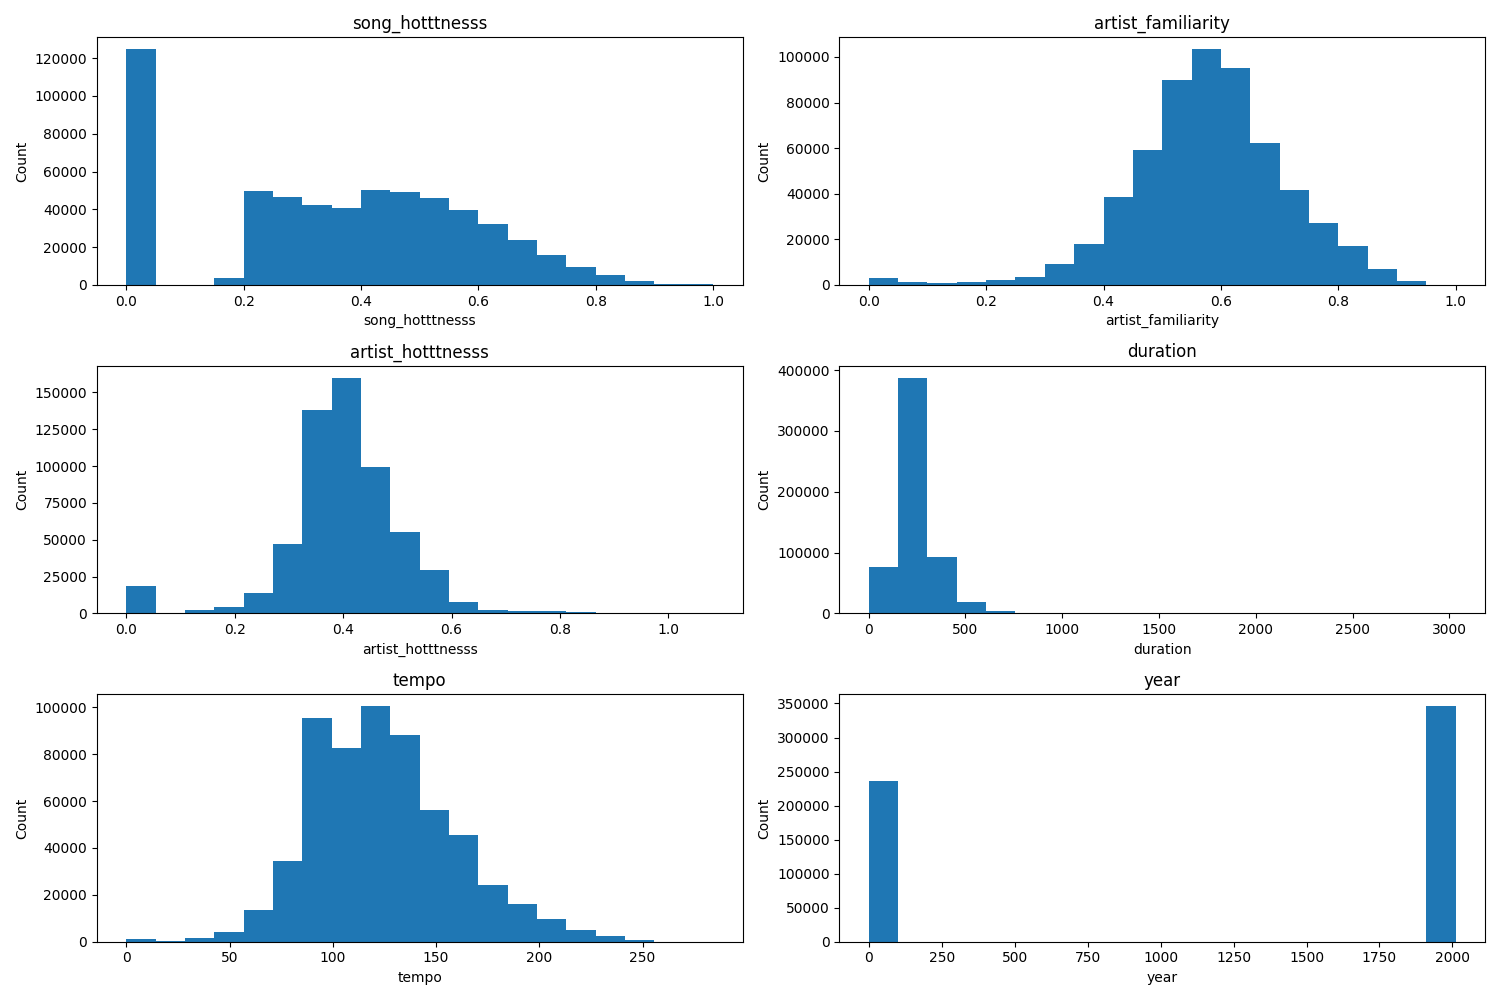

In [7]:
%matplot plt

In [8]:
df.select('year').summary().show()
df.filter("year > 0").select("year").rdd.min()[0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|            581965|
|   mean|1190.3304253692233|
| stddev|  981.474553503066|
|    min|               0.0|
|    25%|               0.0|
|    50%|            1992.0|
|    75%|            2004.0|
|    max|            2011.0|
+-------+------------------+

1922.0

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

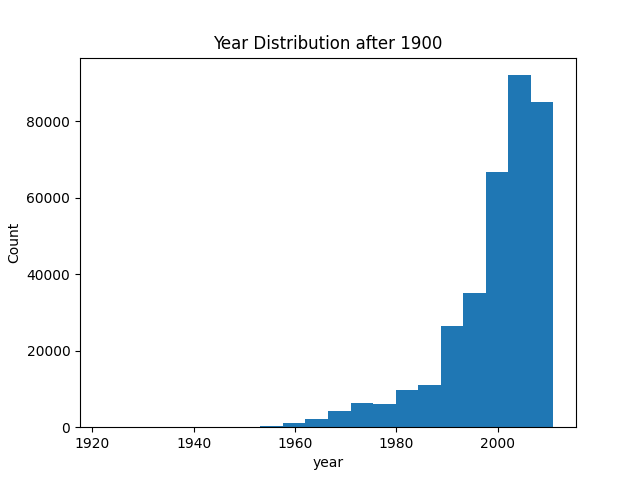

In [9]:
df_filtered = df.filter("year > 1900")
bins, counts = df_filtered.select('year').rdd.flatMap(lambda x: x).histogram(20)
plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.ylabel('Count')
plt.xlabel('year')
plt.title('Year Distribution after 1900')
plt.show()

%matplot plt

Some scatter pair plots would also be interesting to see the correlation between features. Include the plots of the following pairs of features
- `song_hotttnesss` against `artist_familiarity`
- `artist_latitude` against `artist_longitude`
- `song_hotttnesss` against `year`

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

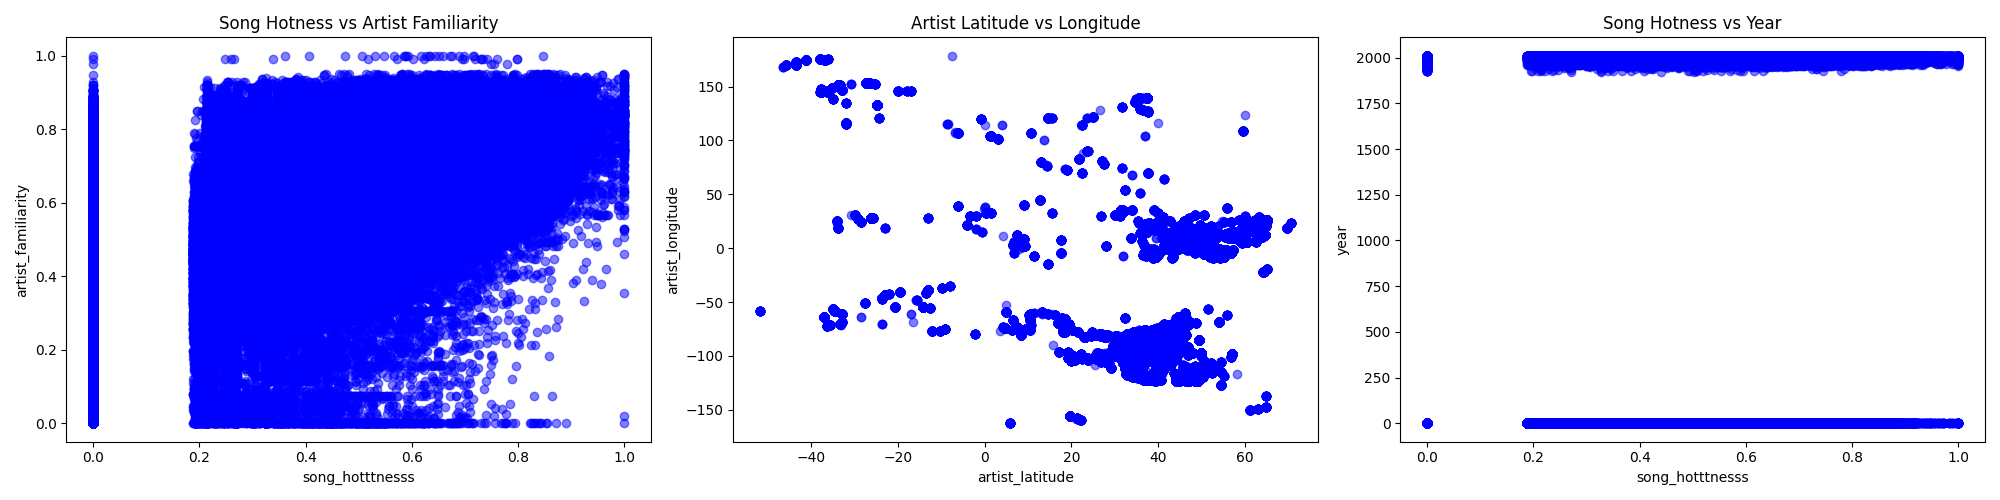

In [10]:
song_hotttnesss_data = df.select('song_hotttnesss').collect()
artist_familiarity_data = df.select('artist_familiarity').collect()
artist_latitude_data = df.select('artist_latitude').collect()
artist_longitude_data = df.select('artist_longitude').collect()
year_data = df.select('year').collect()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(
    [row['song_hotttnesss'] for row in song_hotttnesss_data],
    [row['artist_familiarity'] for row in artist_familiarity_data],
    c="blue", alpha=0.5)
axs[0].set_xlabel('song_hotttnesss')
axs[0].set_ylabel('artist_familiarity')
axs[0].set_title('Song Hotness vs Artist Familiarity')


axs[1].scatter(
    [row['artist_latitude'] for row in artist_latitude_data],
    [row['artist_longitude'] for row in artist_longitude_data],
    c="blue", alpha=0.5)
axs[1].set_xlabel('artist_latitude')
axs[1].set_ylabel('artist_longitude')
axs[1].set_title('Artist Latitude vs Longitude')


axs[2].scatter(
    [row['song_hotttnesss'] for row in song_hotttnesss_data],
    [row['year'] for row in year_data],
    c="blue", alpha=0.5)
axs[2].set_xlabel('song_hotttnesss')
axs[2].set_ylabel('year')
axs[2].set_title('Song Hotness vs Year')


fig.tight_layout()
plt.show()

%matplot plt

### 3. Data Cleaning

In this cleaning step, we are dropping `energy` and `danceability` features. 

In [12]:
df = df.drop("energy","danceability")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

For simplicity, we are dropping `year` values that are less or equal to 1920. Print out the number of samples before and after dropping these rows.

In [13]:
print("Number of samples before: ",df.count())
df = df.filter("year > 1920")
print("Number of samples after: ",df.count())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of samples before:  581965
Number of samples after:  346444

Now, let's do an NaN check to see if there are other problematic features.

In [14]:
# count na
from pyspark.sql.functions import isnan, when, count, col

nan_counts = df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).collect()[0]
nan_counts_dict = nan_counts.asDict()
sorted_nan_counts = sorted(nan_counts_dict.items(), key=lambda item: item[1], reverse=True)
top_nan_features = sorted_nan_counts[:4]
top_nan_features

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('artist_latitude', 219399), ('artist_longitude', 219399), ('artist_familiarity', 1), ('title', 1)]

In [15]:
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0]
null_counts_dict = null_counts.asDict()
sorted_null_counts = sorted(null_counts_dict.items(), key=lambda item: item[1], reverse=True)
top_null_features = sorted_null_counts[:4]
top_null_features

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('artist_location', 151524), ('song_hotttnesss', 0), ('artist_familiarity', 0), ('artist_hotttnesss', 0)]

We should see two features that contain (a lot of) `nan` in them.

For simplicity, we are dropping all records with `nan` in these two features. Note that this drops a significant proportion of our dataset. Since we have a lot of data to fit some rather simple models, this might be ok. 

In [16]:
df = df.dropna(subset=['artist_latitude', 'artist_longitude'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 4. Baseline

Now we have the data (almost) ready to do some preliminary modeling! 

We will be treating this problem as a classification problem, i.e. given some features, predict whether a song will be popular. We define a song to be popular if its `song_hotttnesss` value is above average. 

Then, assign labels to the dataset with the above definition of "popularity".

In [18]:
from pyspark.sql.functions import col, when, mean, min, lit

# assign labels
avg_hot = df.select(mean("song_hotttnesss")).collect()[0][0]
df = df.withColumn("label", when(df.song_hotttnesss > lit(avg_hot),1).otherwise(0))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now let's take a look at how balanced the two classes are.

In [19]:
df.groupby("label").count().show()

total_count = df.count()
popular_count = df.filter(df['label'] == 1).count()
percentage_popular = (popular_count / total_count) * 100
print(f"Total number of songs: {total_count}")
print(f"Number of popular songs: {popular_count}")
print(f"Percentage of songs labeled as 'popular': {percentage_popular}%")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|71137|
|    0|55908|
+-----+-----+

Total number of songs: 127045
Number of popular songs: 71137
Percentage of songs labeled as 'popular': 55.99354559408084%

As how we've been dealing with the `year` feature in earlier assignments, we will shift the feature so that it starts from 0.

In [20]:
# shift years
min_year = df.select(min("year")).collect()[0][0]
df = df.withColumn("year", col("year")- lit(min_year))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Finally, let's concatenate all features (using VectorAssembler) into a feature vector and scale it. 

Note: we will only be using the numeric features for now. Excluding `song_hotttnesss` and the two features we dropped in the data cleaning step, there should be 19-3=16 of them.

In [22]:
# assembling vector

from pyspark.ml.feature import VectorAssembler

numeric_features = df.columns
numeric_features.remove('song_hotttnesss')
numeric_features.remove('artist_id')
numeric_features.remove('artist_location')
numeric_features.remove('artist_name')
numeric_features.remove('title')
numeric_features.remove('artist_terms')
numeric_features.remove('artist_terms_freq') #string
numeric_features.remove('artist_terms_weight') #string
numeric_features.remove('label')

assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")

# Transform the DataFrame to combine numeric features into a single vector column
df_transformed = assembler.transform(df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
# scaling

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Fit the StandardScaler on the data to compute the mean and standard deviation for each feature
scalerModel = scaler.fit(df_transformed)

# Transform the data to scale each feature
df_features = scalerModel.transform(df_transformed)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now let's verify the resulting feature vector is of expected length 16.

In [24]:
# change your variable/column names accordingly
l = df_features.select('features').take(1)[0].features
print('vector len:',len(l))
assert len(l) == 16

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

vector len: 16

Now, we are really ready to fit some models. 

First, do a train-test split on the dataset.

In [49]:
train_df, test_df = df_features.randomSplit([0.8, 0.2], 10605)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will then use select a metric to evaluate our models on.

In [26]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

auc_evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will be fitting two models, logistic regression, and random forest, in the mandatory part. You have the chance go with fancier models in the last section to achieve higher accuracy to earn additional points.

Train a LR and a RF model with default hyperparameters. 

In [50]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression

lr_model = LogisticRegression(featuresCol='scaledFeatures', labelCol='label')
lr_fitted = lr_model.fit(train_df)

lr_predictions_train1 = lr_fitted.transform(train_df)
lr_predictions_test1 = lr_fitted.transform(test_df)

lr_auc_train = auc_evaluator.evaluate(lr_predictions_train1)
lr_auc_test = auc_evaluator.evaluate(lr_predictions_test1)

print("Logistic Regression - Train AUC: ", lr_auc_train)
print("Logistic Regression - Test AUC: ", lr_auc_test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Logistic Regression - Train AUC:  0.7539792865559328
Logistic Regression - Test AUC:  0.7572266225200491

In [51]:
# Random Forest

from pyspark.ml.classification import RandomForestClassifier

rf_model = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='label')
rf_fitted = rf_model.fit(train_df)

rf_predictions_train1 = rf_fitted.transform(train_df)
rf_predictions_test1 = rf_fitted.transform(test_df)

rf_auc_train = auc_evaluator.evaluate(rf_predictions_train1)
rf_auc_test = auc_evaluator.evaluate(rf_predictions_test1)

print("Random Forest - Train AUC: ", rf_auc_train)
print("Random Forest - Test AUC: ", rf_auc_test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Random Forest - Train AUC:  0.7604137298926426
Random Forest - Test AUC:  0.7634045583708734

### 5. Featurization: Bag-of-Words and TF-IDF

In our list of features, we have two features that contain text data, namely `title` and `artist_terms`. In the entity resolution task of HW1, we've seen how TF-IDF could help us featurize textual data. Let's do that here as well. [Bag-of-Words](https://en.wikipedia.org/wiki/Bag-of-words_model) is yet another technique (arguably simpler than TF-IDF) to featurize text features.

In [29]:
# tf-idf on title

from pyspark.ml.feature import Tokenizer, HashingTF, IDF

TF_IDF_NUM_FEATS = 5

# Tokenize the title
tokenizer = Tokenizer(inputCol="title", outputCol="title_tokens")
title_tokens = tokenizer.transform(df)

# Compute Term Frequency - HashingTF: Maps a sequence of terms to their term frequencies
hashingTF = HashingTF(inputCol="title_tokens", outputCol="title_tf", numFeatures=TF_IDF_NUM_FEATS)
title_tf_ = hashingTF.transform(title_tokens)

# Compute Inverse Document Frequency
idf = IDF(inputCol="title_tf", outputCol="title_tfidf")
idfModel = idf.fit(title_tf_)
df = idfModel.transform(title_tf_)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the resulting TF-IDF feature is indeed a vector of length `TF_IDF_NUM_FEATS`.

In [30]:
import pyspark

# change variable/column name to yours
col_name = 'title_tfidf' #'title_features'
head = df.select(col_name).head()
print(head)
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == TF_IDF_NUM_FEATS

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(title_tfidf=SparseVector(5, {1: 0.8022, 2: 0.6637, 3: 0.696}))

Recall that `artist_terms` should be of type string array but we have not yet interpreted from a string literal. Let's do that now.

In [31]:
from pyspark.sql.functions import udf
import pyspark.sql.types as T

# Define a UDF to split the string into an array of strings
split_string_udf = udf(lambda term: term.split(" "), T.ArrayType(T.StringType()))

# Apply the UDF to the 'artist_terms' column
df_tags_arr = df.withColumn("artist_terms_arr", split_string_udf(df.artist_terms))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's do a quick check things indeed worked out.

In [32]:
# change to your variable/column names
col_name = 'artist_terms_arr'
head = df_tags_arr.select(col_name).head()
print(head)
assert type(head[col_name]) == list

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist_terms_arr=["['hardcore", "punk',", "'heavy", "metal',", "'hardcore", "metal',", "'thrash", "core',", "'hard", "rock',", "'death", "core',", "'crossover", "thrash',", "'metalcore',", "'nu", "metal',", "'rock',", "'melodic", 'black', "metal',", "'thrash", "metal',", "'hardcore',", "'melodic", 'death', "metal',", "'power", "metal',", "'screamo',", "'progressive", "metal',", "'black", "metal',", "'punk',", "'emo',", "'death", "metal',", "'hip", "hop',", "'rap',", "'alternative", "rock',", "'punk", "metal',", "'united", "states',", "'singer-songwriter',", "'metal',", "'american',", "'new", 'york', "hardcore',", "'alternative',", "'germany',", "'indie',", "'christian',", "'00s',", "'heavy',", "'new", "york',", "'crossover',", "'new", 'york', "city',", "'old", 'school', "hardcore',", "'drums',", "'trash", "metal',", "'beat", "down']"])

Now perform BoW on the array feature you just created.

In [33]:
# BoW on artist_terms

from pyspark.ml.feature import CountVectorizer

BOW_VOCAB_SIZE = 10
BOW_MIN_DF = 2
# CountVectorizer(..., vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)

cv = CountVectorizer(inputCol="artist_terms_arr", outputCol="artist_terms_bow", vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)
cv_model = cv.fit(df_tags_arr)
df_final = cv_model.transform(df_tags_arr)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the result of BoW is indeed a vector of length `BOW_VOCAB_SIZE`.

In [34]:
# change variable/column name to yours
col_name = 'artist_terms_bow'
head = df_final.select(col_name).head()
print(head)
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == BOW_VOCAB_SIZE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist_terms_bow=SparseVector(10, {0: 2.0, 1: 12.0, 2: 1.0, 3: 1.0, 7: 1.0}))

✰2.6(b) Other than featurizing texts, what other feature engineering would you do on the dataset? Briefly describe one in your writeup.

Now with the new feature columns ready, let's assemble and scale our features once again as we did to prepare for training. 

This time, we should have 16+2=18 features with the two being TF-IDF and BoW features we just created. The total length of the resulting feature vector should be 31.

In [36]:
# Add the TF-IDF and BoW feature column names to the original numeric_features list
numeric_features = numeric_features + ['title_tfidf', 'artist_terms_bow'] #no need to add title_tf since already have title_tfidf

assembler = VectorAssembler(inputCols=numeric_features, outputCol="features")

# Transform the DataFrame to combine numeric features into a single vector column
df_transformed_final = assembler.transform(df_final)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# scaling

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Fit the StandardScaler on the data to compute the mean and standard deviation for each feature
scalerModel = scaler.fit(df_transformed_final)

# Transform the data to scale each feature
df_scaled_features = scalerModel.transform(df_transformed_final)

df_scaled_features.toPandas().head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   song_hotttnesss  ...                                     scaledFeatures
0         0.634759  ...  [6.2520833591287905, 4.19023760140167, 2.55304...
1         0.000000  ...  [4.391876525267228, 3.8176683727154797, 2.9858...
2         0.489038  ...  [6.948372304724165, 5.2301583100352165, 3.1683...
3         0.376170  ...  [5.384264805262915, 4.513184448512579, 2.56266...
4         0.604094  ...  [6.725062769332287, 5.952969935681367, 2.13591...

[5 rows x 32 columns]

Now let's verify the feature vector is of expected length 31.

In [38]:
l = df_scaled_features.select('scaledFeatures').take(1)[0].scaledFeatures
print('vector len:',len(l))
assert len(l) == 31

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

vector len: 31

### 6. Modeling with New Features

Now let's fit LR and RF on our new data. 

In [39]:
train_df, test_df = df_scaled_features.randomSplit([0.8, 0.2], 10605)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
auc_evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
# Logistic Regression

lr_model = LogisticRegression(featuresCol='scaledFeatures', labelCol='label')
lr_fitted = lr_model.fit(train_df)

lr_predictions_train = lr_fitted.transform(train_df)
lr_predictions_test = lr_fitted.transform(test_df)

lr_auc_train = auc_evaluator.evaluate(lr_predictions_train)
lr_auc_test = auc_evaluator.evaluate(lr_predictions_test)

print("Logistic Regression - Train AUC: ", lr_auc_train)
print("Logistic Regression - Test AUC: ", lr_auc_test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Logistic Regression - Train AUC:  0.7697801574473684
Logistic Regression - Test AUC:  0.7720526271105909

In [42]:
# Random Forest

rf_model = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='label')
rf_fitted = rf_model.fit(train_df)

rf_predictions_train = rf_fitted.transform(train_df)
rf_predictions_test = rf_fitted.transform(test_df)

rf_auc_train = auc_evaluator.evaluate(rf_predictions_train)
rf_auc_test = auc_evaluator.evaluate(rf_predictions_test)

print("Random Forest - Train AUC: ", rf_auc_train)
print("Random Forest - Test AUC: ", rf_auc_test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Random Forest - Train AUC:  0.76941906970393
Random Forest - Test AUC:  0.7717634288320094

Recall that AUC is the area under the ROC curve. Now, plot the ROC curves for the four models (including two baselines) in **one single plot**. 


In [52]:
from sklearn.metrics import roc_curve

# Extracts probabilities and labels and calculates FPR, TPR for given predictions DataFrame
def get_roc_data(predictions):
    # Convert DataFrame column to RDD and extract probabilities and labels
    probabilities_labels = predictions.select("probability", "label").rdd \
        .map(lambda row: (float(row["probability"][1]), float(row["label"]))).collect()

    # Separate probabilities and labels
    y_score, y_true = zip(*probabilities_labels)

    # Calculate ROC data
    fpr, tpr, thresholds = roc_curve(y_true, y_score)

    return fpr, tpr

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
fpr_lr, tpr_lr = get_roc_data(lr_predictions_test)
fpr_lr1, tpr_lr1 = get_roc_data(lr_predictions_test1)
fpr_rf, tpr_rf = get_roc_data(rf_predictions_test)
fpr_rf1, tpr_rf1 = get_roc_data(rf_predictions_test1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

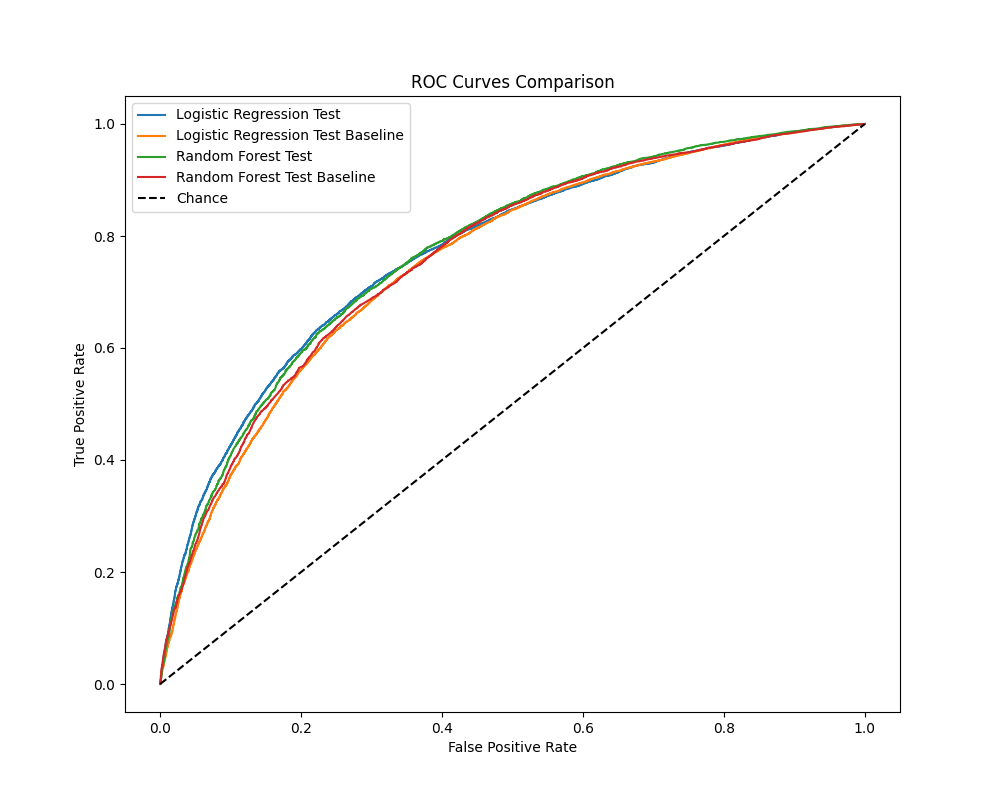

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression Test')
plt.plot(fpr_lr1, tpr_lr1, label='Logistic Regression Test Baseline')
plt.plot(fpr_rf, tpr_rf, label='Random Forest Test')
plt.plot(fpr_rf1, tpr_rf1, label='Random Forest Test Baseline')


plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')

plt.legend(loc='best')
plt.show()
%matplot plt

### 7. Do Your Best

In all previous sections in this assignment and other assignments so far, we have almost specified everything you should do. You might be (and should be!) bored by now. This section gives you a chance to do whatever you want to improve the prediction AUC. 

You can do better data preprocessing, feature engineering, fit fancier models, perform hyperparameter tuning, etc. 

In [67]:
# Try Gradient Boosted Trees
from pyspark.ml.classification import GBTClassifier

gbt_model = GBTClassifier(featuresCol='scaledFeatures', labelCol='label')
gbt_fitted = gbt_model.fit(train_df)

gbt_predictions_train = gbt_fitted.transform(train_df)
gbt_predictions_test = gbt_fitted.transform(test_df)

gbt_auc_train = auc_evaluator.evaluate(gbt_predictions_train)
gbt_auc_test = auc_evaluator.evaluate(gbt_predictions_test)

print("GBT - Train AUC: ", gbt_auc_train)
print("GBT - Test AUC: ", gbt_auc_test)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

GBT - Train AUC:  0.7839209488629004
GBT - Test AUC:  0.7816978328456914

In [79]:
# Tune the hyperparameter

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = ParamGridBuilder() \
    .addGrid(gbt_model.maxDepth, [5, 10]) \
    .addGrid(gbt_model.maxIter, [30, 50]) \
    .addGrid(gbt_model.stepSize, [0.05, 0.1]) \
    .build()

crossval = CrossValidator(estimator=gbt_model,
                          estimatorParamMaps=paramGrid,
                          evaluator=auc_evaluator,
                          numFolds=3)

cvModel = crossval.fit(train_df)

gbt_predictions_test = cvModel.transform(test_df)
gbt_test_auc = auc_evaluator.evaluate(gbt_predictions_test)

bestModel = cvModel.bestModel
bestParams = bestModel.extractParamMap()

print("GBT - Best MaxDepth: ", bestModel._java_obj.getMaxDepth())
print("GBT - Best MaxIter: ", bestModel._java_obj.getMaxIter())
print("GBT - Best StepSize: ", bestModel._java_obj.getStepSize())

print("GBT - Train AUC: ", gbt_auc_train)
print("GBT - Test AUC: ", gbt_test_auc)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

GBT - Best MaxDepth:  10
GBT - Best MaxIter:  50
GBT - Best StepSize:  0.1
GBT - Train AUC:  0.8977033425517154
GBT - Test AUC:  0.8360991130588695

### 8. Don't forget to answer the reflection question on the writeup! ✰2.9